# TM10007 Assignment template

In [29]:
# Run this to use from colab environment
#!pip install -q --upgrade git+https://github.com/jveenland/tm10007_ml.git

## Data loading and cleaning

Below are functions to load the dataset of your choice. After that, it is all up to you to create and evaluate a classification method. Beware, there may be missing values in these datasets. Good luck!

In [48]:
#Load packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#from sklearn.decomposition import PCA
#from sklearn import datasets as ds
from sklearn import metrics
from sklearn import model_selection


# Classifiers 
# from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


# Importing Data loading functions. Uncomment the one you want to use
from worcliver.load_data import load_data

from scipy.stats import ttest_ind, mannwhitneyu, shapiro
from statsmodels.stats.multitest import multipletests
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, cross_val_score
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from scipy.stats import zscore

#import scalers 
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score

In [31]:
# Loading the data
data = load_data()

# Presentation of the data:

In [32]:
# Description of the data
print(f'The number of samples: {len(data.index)}')
print(f'The number of columns: {len(data.columns)}')

# Display basic info
print("First five rows of the dataset:")
print(data.head(), "\n")

print("Dataset info:")
print(data.info(), "\n")

print("Summary statistics:")
print(data.describe(), "\n")

# Counting missing values
missing_values = data.isnull().sum()
total_missing = missing_values.sum()

print(f"Total missing values in the dataset: {total_missing}\n")
print(f"Missing values per column:\n{missing_values[missing_values > 0]}\n")

# Counting categorical and numerical columns
categorical_columns = data.select_dtypes(include=['object']).columns
numerical_columns = data.select_dtypes(exclude=['object']).columns

print(f"Number of categorical columns: {len(categorical_columns)}")
print(f"Number of numerical columns: {len(numerical_columns)}\n")

# Count of each label (benign/malignant)
label_counts = data['label'].value_counts()

print("Label distribution:")
print(label_counts)


The number of samples: 186
The number of columns: 494
First five rows of the dataset:
                 label  PREDICT_original_sf_compactness_avg_2.5D  \
ID                                                                 
Liver-001_0     benign                                  0.878471   
Liver-002_0     benign                                  0.878945   
Liver-003_0     benign                                  0.766162   
Liver-004_0  malignant                                  0.825737   
Liver-005_0  malignant                                  0.828831   

             PREDICT_original_sf_compactness_std_2.5D  \
ID                                                      
Liver-001_0                                  0.023468   
Liver-002_0                                  0.039922   
Liver-003_0                                  0.064140   
Liver-004_0                                  0.062047   
Liver-005_0                                  0.062635   

             PREDICT_original_sf_rad_

# Visualization of features

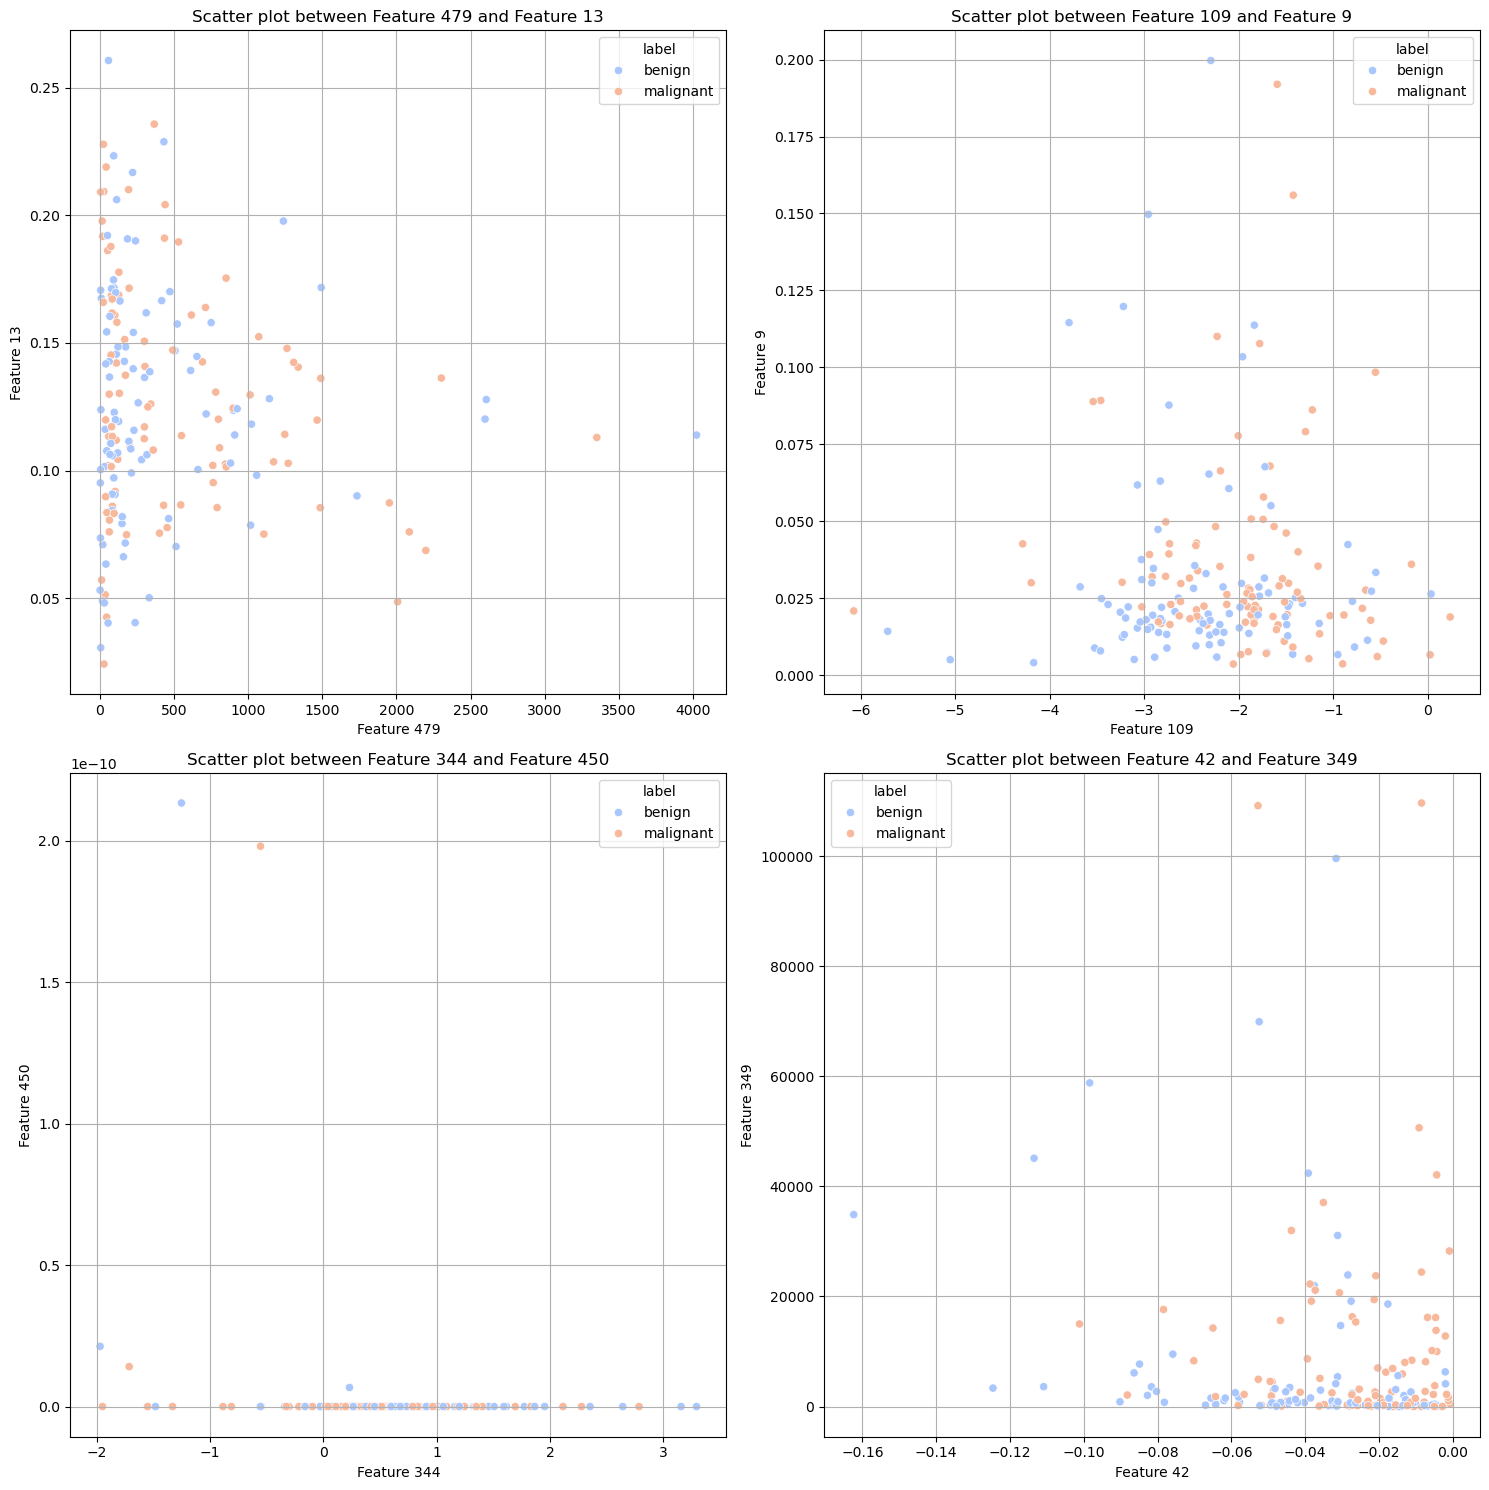

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# For loop with a 4 subplots in which 2 features are put against eachother to visualize the data
fig = plt.figure(figsize=(15, 15))

for i in range(4):
    random_columns = np.random.choice(data.columns[:-1], size=2, replace=False)
    
    # Use the index number of the feature for the title
    feature_num1 = list(data.columns).index(random_columns[0]) + 1  # Adding 1 to make it human-readable (starting from 1)
    feature_num2 = list(data.columns).index(random_columns[1]) + 1  # Adding 1 to make it human-readable (starting from 1)
    
    ax = fig.add_subplot(2, 2, i + 1)  # Manually creating subplots (2 rows, 2 columns)
    sns.scatterplot(x=data[random_columns[0]], y=data[random_columns[1]], hue=data['label'], palette='coolwarm', ax=ax)
    ax.set_title(f"Scatter plot between Feature {feature_num1} and Feature {feature_num2}")
    ax.set_xlabel(f"Feature {feature_num1}")
    ax.set_ylabel(f"Feature {feature_num2}")
    ax.grid(True)

plt.tight_layout()
plt.show()



# Changing labels malignant and benign to 0 and 1

In [43]:
#changing string (malignant or benign) to 0 or 1
num_data = data.copy()

# Transform labels: benign -> 1, malignant -> 0
num_data['label'] = num_data['label'].map({'benign': 1, 'malignant': 0})

# Checking for ouliners

In [44]:
# Checking skewness for each feature in the training set in order to choose the scaler
skewness = x_train.skew()

# Printing the skewness for each feature
print("Skewness of features:")
print(skewness)

# Identifying features that have skewness greater than 1 or less than -1 (highly skewed)
skewed_features = skewness[abs(skewness) > 1].index
print("\nHighly skewed features (Skewness > 1 or < -1):")
print(skewed_features)

# Checking for outliers using Z-scores (Threshold: Z > 3 or Z < -3)
z_scores = np.abs(zscore(x_train))

# Identifying features with Z-scores above the threshold (outliers)
outliers = (z_scores > 3)

# Getting the feature names where outliers exist
outlier_features = x_train.columns[(outliers.any(axis=0))].tolist()
print("\nFeatures with outliers (Z-score > 3):")
print(outlier_features)

# Optionally, calculate the IQR for outlier detection
Q1 = x_train.quantile(0.25)
Q3 = x_train.quantile(0.75)
IQR = Q3 - Q1

# Detecting outliers based on IQR
outliers_iqr = ((x_train < (Q1 - 1.5 * IQR)) | (x_train > (Q3 + 1.5 * IQR)))

# Getting feature names with IQR outliers
outlier_features_iqr = x_train.columns[(outliers_iqr.any(axis=0))].tolist()
print("\nFeatures with outliers based on IQR:")
print(outlier_features_iqr)

Skewness of features:
label                                                     0.027307
PREDICT_original_sf_compactness_avg_2.5D                 -1.336697
PREDICT_original_sf_compactness_std_2.5D                  1.755783
PREDICT_original_sf_rad_dist_avg_2.5D                     0.896949
PREDICT_original_sf_rad_dist_std_2.5D                     1.521164
                                                            ...   
PREDICT_original_phasef_phasesym_peak_position_WL3_N5     0.000000
PREDICT_original_phasef_phasesym_range_WL3_N5            -0.879185
PREDICT_original_phasef_phasesym_energy_WL3_N5            2.949009
PREDICT_original_phasef_phasesym_quartile_range_WL3_N5    0.917332
PREDICT_original_phasef_phasesym_entropy_WL3_N5          -0.241095
Length: 494, dtype: float64

Highly skewed features (Skewness > 1 or < -1):
Index(['PREDICT_original_sf_compactness_avg_2.5D',
       'PREDICT_original_sf_compactness_std_2.5D',
       'PREDICT_original_sf_rad_dist_std_2.5D',
       'PREDICT

C:\Users\manon\AppData\Local\Temp\ipykernel_16760\293724121.py:14: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  z_scores = np.abs(zscore(x_train))


# Splitting data in train and test test

In [45]:
#Splitting data in test and train set 
y = num_data['label']
x = num_data[:]

#x is features, y  = maligne / benign
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

#print the shape of the data sets  
print(f'The shape of the train data: {x_train.shape}')
print(f'The shape of the test data: {x_test.shape}')

x_train.to_csv('x_train.csv', index=False) 
x_test.to_csv('x_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False) 
y_test.to_csv('y_test.csv', index=False)




The shape of the train data: (148, 494)
The shape of the test data: (38, 494)


# Selecting significant features

In [46]:
# Select significant features
# Add the label column back to x_train
x_train_with_label = x_train.copy()
x_train_with_label['label'] = y_train

# Separate benign and malignant samples in training data
benign = x_train_with_label[x_train_with_label['label'] == 1]
malignant = x_train_with_label[x_train_with_label['label'] == 0]

x_train_with_label.to_csv('x_train_label.csv', index=False) 
# Perform statistical analysis
features = []
sig_features = []

# Loop through all features except 'label'
for feature in x_train_with_label.columns:
    if feature == 'label':  # Skip the label column
        continue
        
    # Data for current feature
    benign_values = benign[feature].dropna()
    malignant_values = malignant[feature].dropna()

    # Ignore constant values within group for Shapiro-Wilk test
    if benign_values.nunique() == 1 or malignant_values.nunique() == 1:
        continue
    
    # Normality test (Shapiro-Wilk test, p < 0.05 means not normally distributed)
    _, p_benign = shapiro(benign_values)
    _, p_malignant = shapiro(malignant_values)
    
    # Determine which test to use
    if p_benign > 0.05 and p_malignant > 0.05:  # Both distributions are normal
        test_type = "t-test"
        stat, p_value = ttest_ind(benign_values, malignant_values, equal_var=False)  # Welch's t-test
    else:
        test_type = "Mann-Whitney U-test"
        stat, p_value = mannwhitneyu(benign_values, malignant_values, alternative='two-sided')
    
    # Save results
    feature_entry = {
        "Feature": feature,
        "Test": test_type,
        "p_value": p_value
    }
    features.append(feature_entry)
    
    # Check for significance (p <= 0.05)
    if p_value <= 0.05:
        sig_entry = feature_entry.copy()
        # sig_entry['benign_mean'] = benign_values.mean()
        # sig_entry['malignant_mean'] = malignant_values.mean()
        # sig_entry['benign_std'] = benign_values.std()
        # sig_entry['malignant_std'] = malignant_values.std()
        sig_features.append(sig_entry)

# Convert to DataFrames
features_df = pd.DataFrame(features)
sig_features_df = pd.DataFrame(sig_features)

# Multiple testing correction (False Discovery Rate - Benjamini-Hochberg)
if not features_df.empty:
    reject, p_corrected, alphacSidak, alphacBonf = multipletests(features_df["p_value"], method='fdr_bh')
    features_df["p_value_corrected"] = p_corrected

# Sort significant features by p-value only if there are significant features
if not sig_features_df.empty:
    sig_features_df = sig_features_df.sort_values(by="p_value")

# Print and save results
# print("\nTotal Significant Features:")
# print(sig_features_df)
print(f"\nNumber of significant features: {len(sig_features_df)}")

# Get the list of significant feature names
sig_feature_names = sig_features_df['Feature'].tolist() if not sig_features_df.empty else []

# Select only significant features for training data if there are any
if sig_feature_names:
    x_train_sig = x_train[sig_feature_names].copy()
    # Save results to CSV
    x_train_sig.to_csv('x_train_sig.csv', index=False)
else:
    print("No significant features found. Cannot create x_train_sig.")

# Save results to CSV
# features_df.to_csv('features.csv', index=False)
sig_features_df.to_csv('sig_features_df.csv', index=False)


Number of significant features: 153


# Linear classifier

In [38]:
# Linear classifier
# Test how many feautures are normal distributed and covariances equal (p > 0.05)

#From features_df, sum how many t test used, i.e. are normal distributed from all features
normal_distributed = features_df.loc[features_df['Test'] == 't-test', 'Test'].count() 
print(f' The ammount of normal distributed features is: {normal_distributed}')

#the ammount of normal distibuted from significant features 
normal_distributed_sig = sig_features_df.loc[features_df['Test'] == 't-test', 'Test'].count() 
normal_distributed_non_sig = normal_distributed - normal_distributed_sig
print(f' The ammount of normal distributed features (p>0.05) {normal_distributed_non_sig}')

#Percentage of usable featrues for lineair classifier
print(f' Percentages of usable features for lineair classifier: {normal_distributed_non_sig/(len(data.columns))*100}')


#hier wordt de lineaire classif gemaakt, bepalen of we dat willen met 52
lda = LinearDiscriminantAnalysis()
lda = lda.fit(x_train, y_train)
y_pred_lda = lda.predict(x_test)


 The ammount of normal distributed features is: 60
 The ammount of normal distributed features (p>0.05) 33
 Percentages of usable features for lineair classifier: 6.680161943319838


# Quadratic classifier

In [39]:
# Quadratic classifier
# Test how many feautures are normal distributed and covariances not equal (p < 0.05)

#From features_df, sum how many t test used, i.e. are normal distributed from all features
normal_distributed = features_df.loc[features_df['Test'] == 't-test', 'Test'].count() 
print(f' The ammount of normal distributed features is: {normal_distributed}')

#the ammount of normal distibuted from non significant features 
normal_distributed_sig = sig_features_df.loc[features_df['Test'] == 't-test', 'Test'].count() 
print(f' The ammount of normal distributed features (p < 0.05) is: {normal_distributed_sig}')

#Percentage of usable featrues for quadratic classifier
print(f' Percentages of usable features for lineair classifier: {normal_distributed_sig/(len(data.columns))*100}')

# quadratic uitvoeren, later wss weg
#q_clas = QuadraticDiscriminantAnalysis()
#q_clas = q_clas.fit(x_train, y_train)
#q_clas_pred = q_clas.predict(x_test)

 The ammount of normal distributed features is: 60
 The ammount of normal distributed features (p < 0.05) is: 27
 Percentages of usable features for lineair classifier: 5.465587044534413


# Voorbeeld functie loss funcite (voor lda) --> niet werkend op lda, code later aanpassen

In [40]:
#for lda, X1, Y1 in zip(lda, x_train, y_train):
auc=metrics.roc_auc_score(y_train, y_pred_lda)
accuracy=metrics.accuracy_score(y_train, y_pred_lda)
F1=metrics.f1_score(y_train,y_pred_lda)
precision=metrics.precision_score(y_train,y_pred_lda)
recall=metrics.recall_score(y_train, y_pred_lda)

    # accuracy, AUC, f1score, precision, recall
print(type(lda))
print('Acc:' +str(accuracy))
print('AUC:' +str(auc))
print('F1:' +str(F1))
print('precision:' +str(precision))
print('recall:' +str(recall))

for learning_rate in [0.001, 0.01, 0.1, 0.5]:

    print(f"Training with learning rate {learning_rate}")
    print("Training set score: %f" % lda.score(x_train, y_train))
    print("Test set score: %f" % lda.score(x_test, y_test))

    plt.plot(lda.loss_curve_, label=f'lr = {learning_rate}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
plt.legend()
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [148, 38]

# Support vector machine

In [ ]:
# Support vector machine ('hard)

pipe = Pipeline([
    ('scaler', RobustScaler()), #robust scaler because of outliners 
    ('svm', LinearSVC(C=1000, max_iter=10000))
])

validation_svm_linear = cross_val_score(pipe, x_train, y_train, cv=4)

#svm_linear.fit(x_train, y_train)
#y_train_pred = svm_linear.predict(x_train)
#y_test_pred = svm_linear.predict(x_test)


# Soft margin support vector machine

In [ ]:
#sorft margin SVM, search for the best hyperparameters

# Create a pipeline: first scaling, then the SVM classifier
pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('classifier', SVC())
])

param_distributions = {
    'classifier__C': np.arange(0.001, 1.0, 0.1).tolist(),   
    'classifier__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'classifier__gamma': ['scale', 'auto'],                 # Relevant for rbf, poly, and sigmoid kernels
    'classifier__degree': [2, 3, 4, 5],                     # Only relevant when kernel='poly'
    'classifier__coef0': np.linspace(0, 1, 5).tolist()        # Only relevant for poly and sigmoid kernels
}

# loop over different values for hyperparameters
svm_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    n_iter=30,       # How many combinations of hyperparameters 
    cv=4,            # 4-fold cross-validation
    scoring='roc_auc',
    random_state=42,
    verbose=1,
    n_jobs=-1
)

# Execute the Randomized Search on the training data (using only significant features)
svm_search.fit(x_train_sig, y_train)

# Print results
print("Best CV Score:", svm_search.best_score_)
print("Best Estimator:", svm_search.best_estimator_)
print("Best Parameters:", svm_search.best_params_)

# Random forest classifier

[1.1568364569385866e-09]


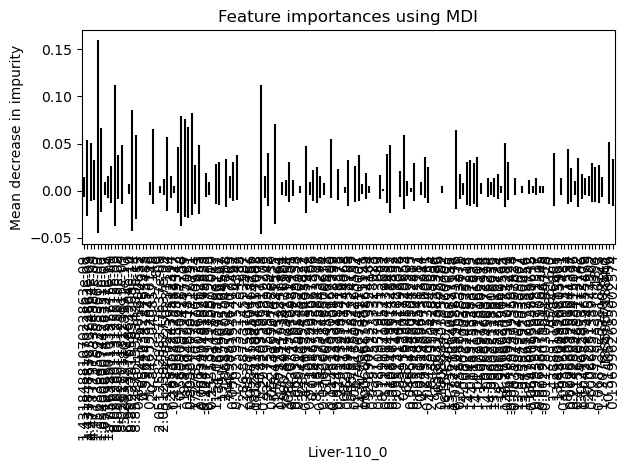

In [49]:
# random forest code
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.inspection import permutation_importance

# make random forest classifier
rf = RandomForestClassifier(n_estimators=10, criterion='gini', min_samples_split=2)

# fit the classifier to the data
rf.fit(x_train_sig, y_train)
validation_rf = cross_val_score(estimator=rf, X=x_train_sig, y=y_train, cv= 4)
#print(validation_rf)
#plot feature importance, impurity-based

importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

feature_names = x_train_sig.iloc[0]
#feature_names = [f"feature {i}" for i in range(x_train_sig.shape[1])]
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

selected_features = []
for name, value in zip(feature_names, forest_importances):
    if value > 0.05:
        selected_features.append(name)
print(selected_features)

# Calculate mean and std of individual classes

In [50]:
#Decription 
## Dit nog aanpassen naar berekenen op basis van 'label' ipv deze nieuwe csv files
# Mean
benign_mean = benign.mean(numeric_only=True)
malignant_mean = malignant.mean(numeric_only=True)

# Standard deviation
benign_std = benign.std(numeric_only=True)
malignant_std = malignant.std(numeric_only=True)

#Print statistics
benign_stats = pd.DataFrame({
    'mean': benign.mean(numeric_only=True),
    'std': benign.std(numeric_only=True)
})
print(benign_stats)
benign_stats.T.to_csv('benign_stats.csv')


malignant_stats = pd.DataFrame({
    'mean': malignant.mean(numeric_only=True),
    'std': malignant.std(numeric_only=True)
})
malignant_stats.T.to_csv('malignant_stats.csv')

                                                          mean          std
label                                                 1.000000     0.000000
PREDICT_original_sf_compactness_avg_2.5D              0.810147     0.077220
PREDICT_original_sf_compactness_std_2.5D              0.066376     0.050309
PREDICT_original_sf_rad_dist_avg_2.5D                28.506844    12.658553
PREDICT_original_sf_rad_dist_std_2.5D                 4.475117     2.573123
...                                                        ...          ...
PREDICT_original_phasef_phasesym_peak_position_...    0.000000     0.000000
PREDICT_original_phasef_phasesym_range_WL3_N5         0.429725     0.106987
PREDICT_original_phasef_phasesym_energy_WL3_N5      709.573837  1157.150564
PREDICT_original_phasef_phasesym_quartile_range...    0.086281     0.094606
PREDICT_original_phasef_phasesym_entropy_WL3_N5      11.905744     1.959428

[494 rows x 2 columns]


# k-NN Classifier

Best Parameters: {'knn__metric': 'euclidean', 'knn__n_neighbors': 25, 'knn__weights': 'uniform', 'pca__n_components': 5}
Test Accuracy: 0.4737


c:\Users\manon\miniconda3\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\manon\miniconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\manon\miniconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\manon\miniconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 380, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\manon\miniconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 90,

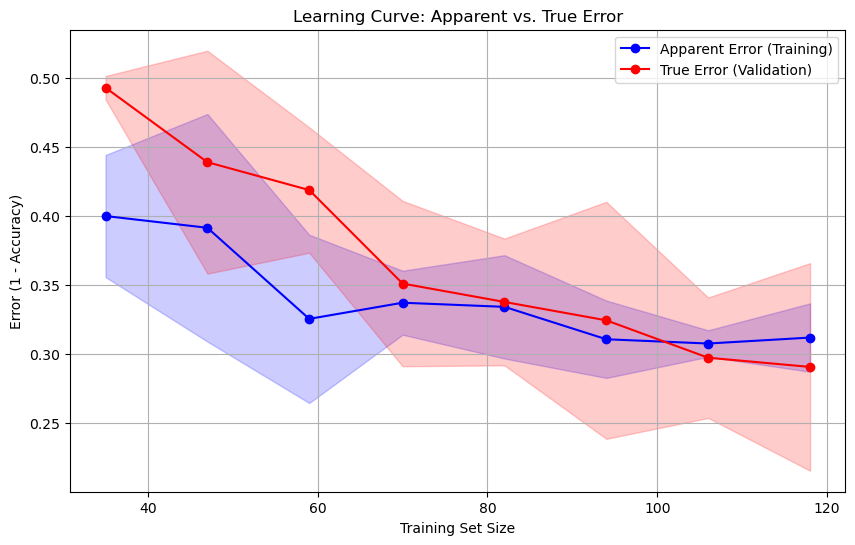

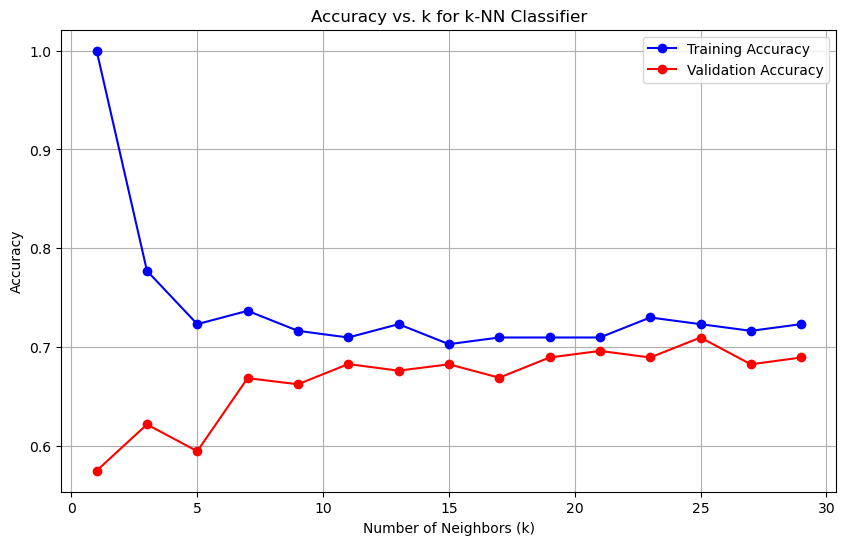

In [51]:
# Making the classifier

# Define the pipeline
pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('pca', PCA()),
    ('knn', KNeighborsClassifier())
])

# Define hyperparameter grid
param_grid = {
    'pca__n_components': [5, 10, 15, 20, 25],
    'knn__n_neighbors': list(range(1, 31, 2)),  # Odd k values from 1 to 29
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan', 'minkowski']
}

# Perform hyperparameter optimization
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Best model evaluation
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred)

# Print best parameters and test accuracy
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Test Accuracy: {test_accuracy:.4f}")

### PLOT 1: Learning Curve (Apparent vs. True Error)
best_k = grid_search.best_params_['knn__n_neighbors']
best_pca = grid_search.best_params_['pca__n_components']

# Define the final best pipeline
pipeline = Pipeline([
    ('scaler', RobustScaler()),  
    ('pca', PCA(n_components=best_pca)),  
    ('knn', KNeighborsClassifier(n_neighbors=best_k, metric='euclidean', weights='uniform'))
])

# Generate learning curve data
train_sizes, train_scores, val_scores = learning_curve(
    pipeline, x_train, y_train, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Compute mean and standard deviation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Convert accuracy to error (1 - accuracy)
train_error = 1 - train_mean
val_error = 1 - val_mean

# Plot Apparent Error (Training) vs True Error (Validation)
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_error, marker='o', color='blue', label='Apparent Error (Training)')
plt.plot(train_sizes, val_error, marker='o', color='red', label='True Error (Validation)')
plt.fill_between(train_sizes, train_error - train_std, train_error + train_std, color='blue', alpha=0.2)
plt.fill_between(train_sizes, val_error - val_std, val_error + val_std, color='red', alpha=0.2)

# Labels and Title
plt.xlabel('Training Set Size')
plt.ylabel('Error (1 - Accuracy)')
plt.title('Learning Curve: Apparent vs. True Error')
plt.legend()
plt.grid(True)
plt.show()

### PLOT 2: Accuracy vs. k
k_values = list(range(1, 31, 2))  # Odd k values from 1 to 29
train_accuracies = []
val_accuracies = []

# Loop through different k values
for k in k_values:
    # Define the pipeline with current k
    pipeline = Pipeline([
        ('scaler', RobustScaler()),  
        ('pca', PCA(n_components=best_pca)),  
        ('knn', KNeighborsClassifier(n_neighbors=k, metric='euclidean', weights='uniform'))
    ])
    
    # Perform cross-validation
    scores = cross_val_score(pipeline, x_train, y_train, cv=5, scoring='accuracy')
    
    # Fit on training data to get training accuracy
    pipeline.fit(x_train, y_train)
    train_accuracy = accuracy_score(y_train, pipeline.predict(x_train))

    # Store accuracies
    train_accuracies.append(train_accuracy)
    val_accuracies.append(scores.mean())

# Plot training vs validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracies, marker='o', linestyle='-', label='Training Accuracy', color='blue')
plt.plot(k_values, val_accuracies, marker='o', linestyle='-', label='Validation Accuracy', color='red')

# Labels and Title
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. k for k-NN Classifier")
plt.legend()
plt.grid(True)
plt.show()
